# load data

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn import preprocessing

import numpy as np

In [2]:
path = r'C:\Users\adria\pomiary'

header = ['Module-44','Power-44','Module-45','Power-45','Module-46','Power-46','Value']

df = pd.read_csv(path+"/Data.csv", sep=";",header=None,names=header)
df=pd.DataFrame(df)
data = df.iloc[: , :-1]
target = df['Value']
features_train, features_test, labels_train, labels_test = train_test_split(data,target, train_size=0.7,random_state=1)

scaler_train = preprocessing.StandardScaler().fit(features_train)
scaler_test = preprocessing.StandardScaler().fit(features_test)

features_train = scaler_train.transform(features_train)
features_test = scaler_test.transform(features_test)

#output char to int for random forest
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc2 = LabelEncoder()

enc.fit(labels_train)
enc2.fit(labels_train)

randomForest_labels_train = enc.transform(labels_train)+1
randomForest_labels_test = enc.transform(labels_test)+1

test_Number = 100

In [3]:
print(features_train)

[[-0.23019027 -0.38642199  1.36071856  0.53382529 -0.55685452 -0.33700493]
 [ 0.09738133 -0.19907656  0.5002225  -0.09088362 -0.26930897 -0.30924825]
 [ 2.44818931  2.51884697  0.08212838 -0.15182188  0.67959135  0.06517605]
 ...
 [-0.53463918 -0.46101883 -0.26142184 -0.22519312  1.07257027  0.28232296]
 [ 0.40183023 -0.1000582   0.03351278 -0.19063483  1.7876002   0.85080946]
 [-0.56546945 -0.46401371 -0.38782239 -0.23086943 -0.54151876 -0.33688763]]


# kNN

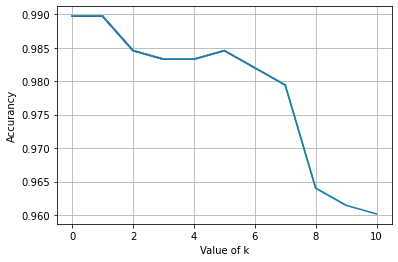

In [4]:
# k choose

import matplotlib.pyplot as plt
#plt.subplots(figsize=(10,8))
plt.grid()
k = []
for i in range(1,12):
    
    start = time.time()
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(features_train, labels_train)
    clas_pred = classifier.predict(features_test)
    end = time.time()
    accurancy = accuracy_score(labels_test, clas_pred)
    k.append(accurancy)
    plt.plot(k)
    plt.xlabel("Value of k")
    plt.ylabel("Accurancy")
    plt.savefig('kChoose.png')
    

In [37]:
kNN_time = 0;
for i in range(1,test_Number):
    start = time.time()

    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(features_train, labels_train)
    clas_pred = classifier.predict(features_test)

    end = time.time()
    
    kNN_time = kNN_time + end - start
kNN_time = kNN_time/i
kNN_accuracy = round(accuracy_score(labels_test, clas_pred) * 100,2)

In [38]:
print("Accuracy:",kNN_accuracy)
print("Time:",kNN_time)

Accuracy: 98.33
Time: 0.061008407612039586


In [7]:
i = 0
state = [0,0,0,0,0,0,0,0]

for x in range(0,len(clas_pred)):
   
    if clas_pred[x] != np.array(labels_test)[x]:
        i=i+1
        print("nr. ",i,".",clas_pred[x],np.array(labels_test)[x])
        
        if(np.array(labels_test)[x]=='0_0_0'):
            state[0] = state[0] + 1
        elif(np.array(labels_test)[x]=='1_0_0'):
            state[1] = state[1] + 1
        elif(np.array(labels_test)[x]=='0_1_0'):
            state[2] = state[2] + 1
        elif(np.array(labels_test)[x]=='0_0_1'):
            state[3] = state[3] + 1
        elif(np.array(labels_test)[x]=='1_0_1'):
            state[4] = state[4] + 1
        elif(np.array(labels_test)[x]=='1_1_0'):
            state[5] = state[5] + 1
        elif(np.array(labels_test)[x]=='0_1_1'):
            state[6] = state[6] + 1
        elif(np.array(labels_test)[x]=='1_1_1'):
            state[7] = state[7] + 1
            
print(i+kNN_accuracy*778/100)
print(state)

nr.  1 . 1_1_1 1_0_1
nr.  2 . 0_1_0 0_0_0
nr.  3 . 0_1_0 0_0_0
nr.  4 . 1_1_1 1_0_1
nr.  5 . 0_0_0 0_1_0
nr.  6 . 0_1_0 0_0_0
nr.  7 . 0_1_0 0_0_0
nr.  8 . 1_0_1 0_0_1
nr.  9 . 1_1_1 1_0_1
nr.  10 . 0_1_0 0_0_0
nr.  11 . 0_1_0 0_0_0
nr.  12 . 0_1_0 0_0_0
nr.  13 . 1_0_1 0_0_0
778.0074000000001
[8, 0, 1, 1, 3, 0, 0, 0]


In [8]:
logTrain = []
for x in range(0,len(labels_train)):
    #print(labels_test.iloc[x][2])
    logTrain.append(labels_train.iloc[x][2])
#print(logTrain)

logTest = []
for x in range(0,len(labels_test)):
    #print(labels_test.iloc[x][2])
    logTest.append(labels_test.iloc[x][2])
#print(logTest)

# logistic regression

In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [10]:
logReg_time = 0;
for i in range(1,test_Number):
    start = time.time()

    clf = LogisticRegression(random_state=0).fit(features_train, logTrain)
    s = clf.predict(features_test)

    end = time.time()
    
    logReg_time = logReg_time + end - start
logReg_time = logReg_time/i
logReg_accuracy = round(accuracy_score(logTest, s)*100,3)

In [11]:
print("Accuracy:",logReg_accuracy)
print("Time:",logReg_time)

Accuracy: 97.172
Time: 0.04937817833640359


# decision tree

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [13]:
dTree_time = 0
for i in range(1,test_Number):
    start = time.time()

    clf = DecisionTreeClassifier(random_state=1)

    # Train Decision Tree Classifer
    clf = clf.fit(features_train,labels_train)

    #Predict the response for test dataset
    y_pred = clf.predict(features_test)

    end = time.time()
    dTree_time = dTree_time + end - start
dTree_time = dTree_time/i
dTree_accuracy = round(accuracy_score(labels_test, y_pred)*100,3)

In [14]:
print("Accuracy:",dTree_accuracy)
print("Time:",dTree_time)

Accuracy: 88.946
Time: 0.01106964698945633


In [15]:
i = 0
state = [0,0,0,0,0,0,0,0]

for x in range(0,len(y_pred)):
   
    if y_pred[x] != np.array(labels_test)[x]:
        i=i+1
        print("nr. ",i,".",y_pred[x],np.array(labels_test)[x])
        
        if(np.array(labels_test)[x]=='0_0_0'):
            state[0] = state[0] + 1
        elif(np.array(labels_test)[x]=='1_0_0'):
            state[1] = state[1] + 1
        elif(np.array(labels_test)[x]=='0_1_0'):
            state[2] = state[2] + 1
        elif(np.array(labels_test)[x]=='0_0_1'):
            state[3] = state[3] + 1
        elif(np.array(labels_test)[x]=='1_0_1'):
            state[4] = state[4] + 1
        elif(np.array(labels_test)[x]=='1_1_0'):
            state[5] = state[5] + 1
        elif(np.array(labels_test)[x]=='0_1_1'):
            state[6] = state[6] + 1
        elif(np.array(labels_test)[x]=='1_1_1'):
            state[7] = state[7] + 1
            
print(i+dTree_accuracy*778/100)
print(state)

nr.  1 . 1_0_0 0_0_0
nr.  2 . 1_0_0 1_0_1
nr.  3 . 0_0_0 0_0_1
nr.  4 . 0_1_0 0_1_1
nr.  5 . 0_0_0 0_0_1
nr.  6 . 1_0_0 1_0_1
nr.  7 . 1_1_1 0_1_1
nr.  8 . 0_0_0 0_0_1
nr.  9 . 0_0_0 0_0_1
nr.  10 . 0_0_0 0_0_1
nr.  11 . 0_1_0 0_0_0
nr.  12 . 0_0_0 0_0_1
nr.  13 . 0_1_0 0_1_1
nr.  14 . 0_1_0 1_1_1
nr.  15 . 1_1_1 0_1_1
nr.  16 . 1_1_0 1_1_1
nr.  17 . 0_0_0 0_0_1
nr.  18 . 0_0_0 0_0_1
nr.  19 . 0_0_0 0_0_1
nr.  20 . 1_1_0 1_1_1
nr.  21 . 0_0_0 0_0_1
nr.  22 . 0_1_0 0_0_0
nr.  23 . 0_0_0 0_0_1
nr.  24 . 1_1_0 1_0_0
nr.  25 . 0_1_0 0_1_1
nr.  26 . 1_0_0 1_0_1
nr.  27 . 0_1_0 0_0_0
nr.  28 . 0_0_0 0_0_1
nr.  29 . 1_0_0 1_0_1
nr.  30 . 1_1_0 1_0_0
nr.  31 . 0_1_1 0_0_1
nr.  32 . 0_1_0 1_1_1
nr.  33 . 0_1_0 0_0_0
nr.  34 . 0_1_0 0_0_0
nr.  35 . 1_0_0 0_0_1
nr.  36 . 0_1_0 0_0_0
nr.  37 . 0_1_0 1_1_1
nr.  38 . 1_0_0 1_0_1
nr.  39 . 0_1_0 0_0_0
nr.  40 . 0_0_0 0_0_1
nr.  41 . 0_1_0 0_0_0
nr.  42 . 0_1_0 1_1_1
nr.  43 . 0_1_1 0_0_1
nr.  44 . 0_1_1 0_0_1
nr.  45 . 0_0_0 0_0_1
nr.  46 . 1_1_0 1_1

In [16]:
clf.get_depth()

7

In [17]:
clf.get_n_leaves()

23

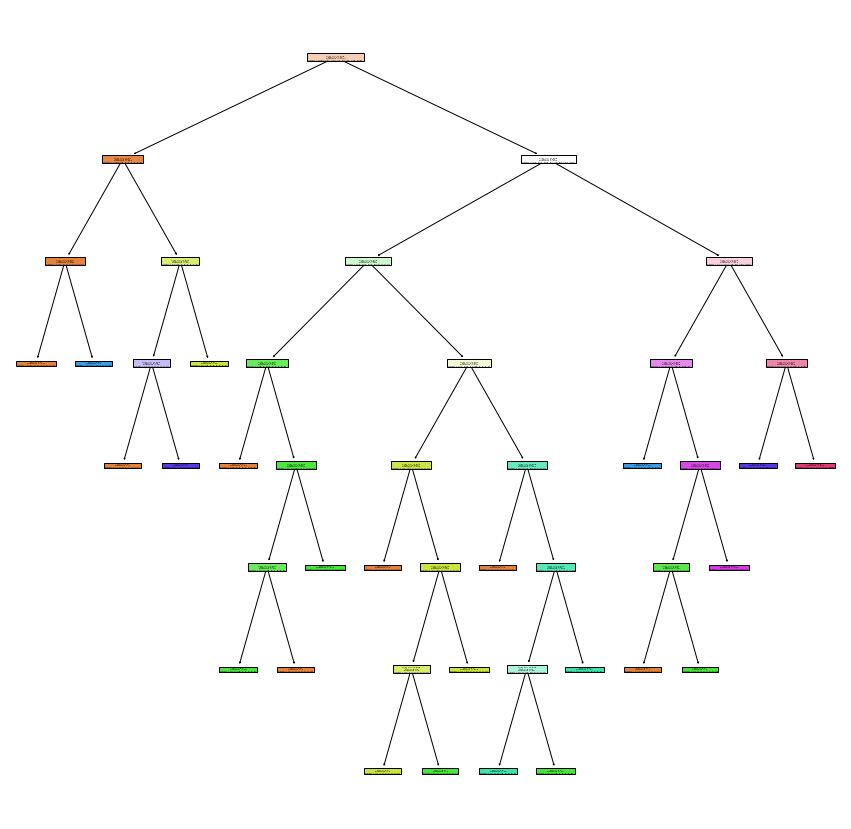

In [18]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
                   filled=True)
fig.savefig("decistion_tree.png")

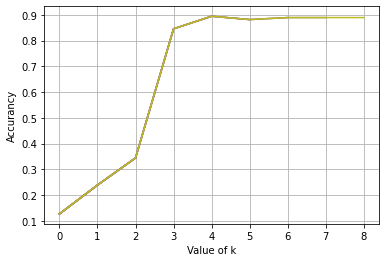

In [19]:
k = []
for i in range(1,10):
    start = time.time()

    clf = DecisionTreeClassifier(random_state=1,max_depth=i)

    # Train Decision Tree Classifer
    clf = clf.fit(features_train,labels_train)

    #Predict the response for test dataset
    y_pred = clf.predict(features_test)
    accurancy = accuracy_score(labels_test, y_pred)
    k.append(accurancy)
    plt.plot(k)
    plt.grid()
    plt.xlabel("Value of k")
    plt.ylabel("Accurancy")

# random forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [21]:
RF_time = 0
for i in range(1,test_Number):
    start = time.time()

    rf = RandomForestRegressor(n_estimators = 200, random_state = 1)
    rf.fit(features_train, randomForest_labels_train);
    predictions = rf.predict(features_test)

    # Calculate the absolute errors
    errors = abs(np.array(predictions.astype(int)) - np.array(randomForest_labels_test.astype(int)))

    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / randomForest_labels_test)

    end = time.time()
    RF_time = RF_time +end - start
RF_time = RF_time/i
RF_accuracy = round(100 - np.mean(mape),3)

In [22]:
# Calculate and display accuracy
print('Accuracy:', RF_accuracy)
print("Time:",RF_time)

Accuracy: 90.441
Time: 1.3197077548865117


In [23]:
k = []
for i in range(1,5):
    rf = RandomForestRegressor(n_estimators = i, random_state = 1)
    rf.fit(features_train, randomForest_labels_train);
    predictions = rf.predict(features_test)

    #Predict the response for test dataset
    # Calculate the absolute errors
    errors = abs(np.array(predictions.astype(int)) - np.array(randomForest_labels_test.astype(int)))
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / randomForest_labels_test)
    accurancy = round(np.mean(mape),3)
    k.append(accurancy)


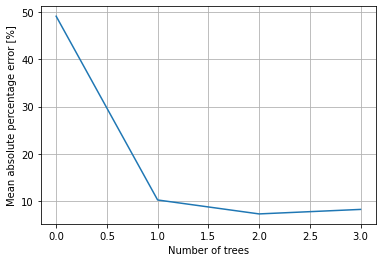

In [24]:

plt.plot(k)
plt.grid()
plt.xlabel("Number of trees")
plt.ylabel("Mean absolute percentage error [%]")
plt.savefig('randomForestN.png')

# SVM

In [25]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
print(features_train[:,0])
df2s = pd.DataFrame({'col1': features_train[:,0],
                    'col2': features_train[:,2],
                    'col3': features_train[:,4]})

df3s = pd.DataFrame({'col1': features_test[:,0],
                    'col2': features_test[:,2],
                    'col3': features_test[:,4]})

print(df2s)

[-0.23019027  0.09738133  2.44818931 ... -0.53463918  0.40183023
 -0.56546945]
          col1      col2      col3
0    -0.230190  1.360719 -0.556855
1     0.097381  0.500223 -0.269309
2     2.448189  0.082128  0.679591
3     2.448189  0.082128  0.710263
4    -0.557762 -0.293832 -0.468674
...        ...       ...       ...
1809  2.394236 -0.058857  0.694927
1810  2.505996  0.043236 -0.380493
1811 -0.534639 -0.261422  1.072570
1812  0.401830  0.033513  1.787600
1813 -0.565469 -0.387822 -0.541519

[1814 rows x 3 columns]


In [27]:
SVM_time = 0
for i in range(1,test_Number):
    start = time.time()

    #Create a svm Classifier
    clf = svm.SVC(kernel='rbf',random_state=1) # Linear Kernel

    #Train the model using the training sets
    clf.fit(df2s, labels_train)

    #Predict the response for test dataset
    y_pred = clf.predict(df3s)

    end = time.time()
    SVM_time = SVM_time + end - start
    
SVM_time = SVM_time/i
SVM_accuracy = round(accuracy_score(labels_test, y_pred)*100,3)

In [28]:
print("Accuracy:",SVM_accuracy)
print("Time:",SVM_time)

Accuracy: 89.075
Time: 0.31728083677966185


In [29]:
i = 0
state = [0,0,0,0,0,0,0,0]

for x in range(0,len(y_pred)):
   
    if y_pred[x] != np.array(labels_test)[x]:
        i=i+1
        print("nr. ",i,".",y_pred[x],np.array(labels_test)[x])
        
        if(np.array(labels_test)[x]=='0_0_0'):
            state[0] = state[0] + 1
        elif(np.array(labels_test)[x]=='1_0_0'):
            state[1] = state[1] + 1
        elif(np.array(labels_test)[x]=='0_1_0'):
            state[2] = state[2] + 1
        elif(np.array(labels_test)[x]=='0_0_1'):
            state[3] = state[3] + 1
        elif(np.array(labels_test)[x]=='1_0_1'):
            state[4] = state[4] + 1
        elif(np.array(labels_test)[x]=='1_1_0'):
            state[5] = state[5] + 1
        elif(np.array(labels_test)[x]=='0_1_1'):
            state[6] = state[6] + 1
        elif(np.array(labels_test)[x]=='1_1_1'):
            state[7] = state[7] + 1
            
print(i+SVM_accuracy*778/100)
print(state)

nr.  1 . 0_0_0 0_1_0
nr.  2 . 0_0_0 1_0_1
nr.  3 . 0_0_0 0_0_1
nr.  4 . 0_1_0 0_1_1
nr.  5 . 1_1_0 1_0_0
nr.  6 . 0_0_0 0_0_1
nr.  7 . 0_0_0 1_0_1
nr.  8 . 1_1_0 1_0_0
nr.  9 . 0_0_0 0_1_0
nr.  10 . 0_0_0 0_0_1
nr.  11 . 1_1_0 1_0_0
nr.  12 . 0_0_0 0_1_0
nr.  13 . 0_0_0 0_0_1
nr.  14 . 0_0_0 0_0_1
nr.  15 . 0_0_0 0_0_1
nr.  16 . 0_1_0 0_1_1
nr.  17 . 0_1_0 1_1_1
nr.  18 . 0_0_0 0_1_0
nr.  19 . 0_0_0 0_0_1
nr.  20 . 0_0_0 0_0_1
nr.  21 . 0_0_0 0_0_1
nr.  22 . 0_0_0 0_1_0
nr.  23 . 1_0_0 1_1_0
nr.  24 . 0_0_0 0_0_1
nr.  25 . 0_0_0 0_0_1
nr.  26 . 0_1_0 0_1_1
nr.  27 . 0_0_0 1_0_1
nr.  28 . 0_0_0 0_0_1
nr.  29 . 0_1_0 1_1_1
nr.  30 . 0_0_0 0_1_0
nr.  31 . 0_1_0 0_0_0
nr.  32 . 0_0_0 0_0_1
nr.  33 . 0_1_0 0_0_0
nr.  34 . 0_1_0 1_1_1
nr.  35 . 0_0_0 0_1_0
nr.  36 . 0_0_0 0_1_0
nr.  37 . 0_1_0 0_0_0
nr.  38 . 1_0_0 1_1_0
nr.  39 . 0_0_0 0_0_1
nr.  40 . 0_0_0 0_1_0
nr.  41 . 0_1_0 1_1_1
nr.  42 . 1_0_1 1_1_1
nr.  43 . 0_0_0 0_1_0
nr.  44 . 0_0_0 0_1_0
nr.  45 . 0_0_0 0_1_0
nr.  46 . 0_0_0 0_0

#  multi-layer perceptron (MLP) algorithm

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
MLP_time = 0
for i in range(1,test_Number):
    start = time.time()

    clf = MLPClassifier(solver='lbfgs', random_state=1)
    clf = clf.fit(features_train,labels_train)
    y_pred = clf.predict(features_test)

    end = time.time()
    MLP_time = MLP_time + end - start
MLP_time = MLP_time/i
MLP_accuracy = round(accuracy_score(labels_test, y_pred)*100,3)

C:\Users\adria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\adria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\adria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [32]:
print("Accuracy:",MLP_accuracy)
print("Time:",MLP_time)

Accuracy: 93.059
Time: 2.433283379583648


In [33]:
i = 0
state = [0,0,0,0,0,0,0,0]

for x in range(0,len(y_pred)):
   
    if y_pred[x] != np.array(labels_test)[x]:
        i=i+1
        print("nr. ",i,".",y_pred[x],np.array(labels_test)[x])
        
        if(np.array(labels_test)[x]=='0_0_0'):
            state[0] = state[0] + 1
        elif(np.array(labels_test)[x]=='1_0_0'):
            state[1] = state[1] + 1
        elif(np.array(labels_test)[x]=='0_1_0'):
            state[2] = state[2] + 1
        elif(np.array(labels_test)[x]=='0_0_1'):
            state[3] = state[3] + 1
        elif(np.array(labels_test)[x]=='1_0_1'):
            state[4] = state[4] + 1
        elif(np.array(labels_test)[x]=='1_1_0'):
            state[5] = state[5] + 1
        elif(np.array(labels_test)[x]=='0_1_1'):
            state[6] = state[6] + 1
        elif(np.array(labels_test)[x]=='1_1_1'):
            state[7] = state[7] + 1
            
print(i+MLP_accuracy*778/100)
print(state)

nr.  1 . 0_1_0 0_0_1
nr.  2 . 0_0_0 0_0_1
nr.  3 . 0_0_0 0_0_1
nr.  4 . 0_1_0 0_0_1
nr.  5 . 0_0_0 0_0_1
nr.  6 . 0_0_0 0_0_1
nr.  7 . 0_1_0 0_0_0
nr.  8 . 0_0_0 0_0_1
nr.  9 . 0_0_0 0_1_0
nr.  10 . 0_0_0 0_0_1
nr.  11 . 0_0_0 0_0_1
nr.  12 . 0_0_0 0_1_0
nr.  13 . 0_0_0 0_0_1
nr.  14 . 1_1_0 1_0_0
nr.  15 . 1_1_0 0_1_0
nr.  16 . 0_0_0 0_0_1
nr.  17 . 1_1_0 1_0_0
nr.  18 . 1_1_0 1_0_0
nr.  19 . 0_1_0 0_0_1
nr.  20 . 0_1_0 0_0_0
nr.  21 . 1_0_1 0_0_1
nr.  22 . 0_1_0 0_0_1
nr.  23 . 0_0_0 0_0_1
nr.  24 . 0_1_0 0_0_1
nr.  25 . 0_0_0 0_0_1
nr.  26 . 0_0_0 0_0_1
nr.  27 . 1_1_0 1_0_0
nr.  28 . 1_1_0 1_0_0
nr.  29 . 0_1_0 0_0_0
nr.  30 . 1_1_0 1_0_0
nr.  31 . 0_0_0 0_0_1
nr.  32 . 0_0_0 0_0_1
nr.  33 . 0_0_0 0_0_1
nr.  34 . 0_1_0 0_0_1
nr.  35 . 0_0_0 0_0_1
nr.  36 . 0_0_0 0_0_1
nr.  37 . 0_1_0 0_0_1
nr.  38 . 0_0_0 0_0_1
nr.  39 . 1_1_0 1_0_0
nr.  40 . 0_1_0 0_0_1
nr.  41 . 0_1_0 0_0_1
nr.  42 . 0_0_0 0_0_1
nr.  43 . 0_1_0 0_0_1
nr.  44 . 1_0_1 0_0_0
nr.  45 . 0_1_0 0_0_1
nr.  46 . 0_0_0 0_0

In [34]:
results_data = {'Accuracy':[kNN_accuracy,logReg_accuracy,dTree_accuracy,RF_accuracy,SVM_accuracy,MLP_accuracy],'Average Time':[kNN_time,logReg_time,dTree_time,RF_time,SVM_time,MLP_time]}

results = pd.DataFrame(results_data, index =['kNN', 'Logistic regression','decision tree', 'random forest', 'SVM','MLP'])

print(results)

                     Accuracy  Average Time
kNN                    98.330      0.101014
Logistic regression    97.172      0.049378
decision tree          88.946      0.011070
random forest          90.441      1.319708
SVM                    89.075      0.317281
MLP                    93.059      2.433283
